# EDA on Penguin in Antartica dataset

In this dataset, we are shifting our focus to mainly 3 type of penguins ie Adelie, Gentoo & Chinstrap Penguins

species: penguin species (Chinstrap, Adélie, or Gentoo)
culmen_length_mm: culmen length (mm) 
culmen_depth_mm: culmen depth (mm)
flipper_length_mm: flipper length (mm)
body_mass_g: body mass (g)
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
sex: penguin sex

culmen is the top part of the beak of a penguin. Its length and depth is given in the dataset.

In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('../dataset/penguins_size.csv')

In [8]:
#Lets find the size of the dataset
df.shape

(344, 7)

There are 344 rows and 7 columns

In [7]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [10]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [12]:
#Lets find more info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


There are null values present in culmen length, culmen depth, flipper length, body mass and sex

# Handling Null Values

In [13]:
#finding number of null values present in each column of the dataset
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [14]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


The description shows that there is not much outliers in the data. so lets use mean to replace the numeric null values

In [15]:
#Taking the mean of the column to replace NaN
df["culmen_length_mm"] = df["culmen_length_mm"].fillna(value = df["culmen_length_mm"].mean())
df["culmen_depth_mm"] = df["culmen_depth_mm"].fillna(value = df["culmen_depth_mm"].mean())
df["flipper_length_mm"] = df["flipper_length_mm"].fillna(value = df["flipper_length_mm"].mean())
df["body_mass_g"] = df["body_mass_g"].fillna(value = df["body_mass_g"].mean())

In [17]:
#replacing Sex NaN values with MALE
df['sex'] = df['sex'].fillna('MALE')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [20]:
df.tail(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
334,Gentoo,Biscoe,46.20000,14.10000,217.000000,4375.000000,FEMALE
335,Gentoo,Biscoe,55.10000,16.00000,230.000000,5850.000000,MALE
336,Gentoo,Biscoe,44.50000,15.70000,217.000000,4875.000000,.
337,Gentoo,Biscoe,48.80000,16.20000,222.000000,6000.000000,MALE
338,Gentoo,Biscoe,47.20000,13.70000,214.000000,4925.000000,FEMALE
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,MALE
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,FEMALE
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,MALE
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,FEMALE
343,Gentoo,Biscoe,49.90000,16.10000,213.000000,5400.000000,MALE


In [22]:
df.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                       .
Name: 336, dtype: object

In [23]:
df.loc[336,'sex'] = 'MALE'

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


There no null values in the data set now. 

# EDA

In [26]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.443643,1.969027,14.020657,799.613058
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [27]:
#finding the count of each species
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

There are 3 classes(species) - Adelie, Gentoo and Chinstrap. 

In [28]:
import seaborn as sns

<Axes: xlabel='species', ylabel='count'>

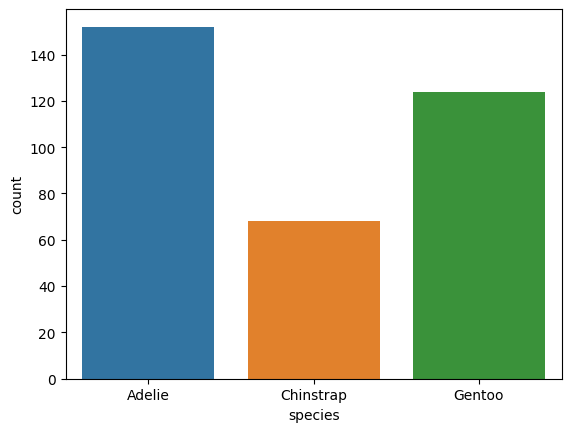

In [30]:
sns.countplot(x = 'species', data = df)

In [31]:
#finding the count of island
df['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

<Axes: xlabel='island', ylabel='count'>

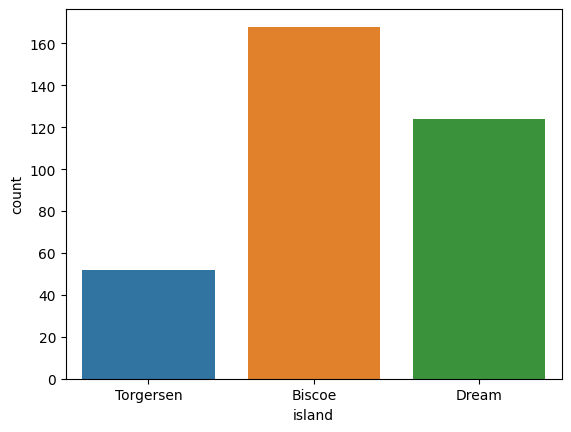

In [32]:
sns.countplot(x = 'island', data = df)

Most of the penguins are present in the Biscoe island

C:\Roshni\MLcode\mlenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


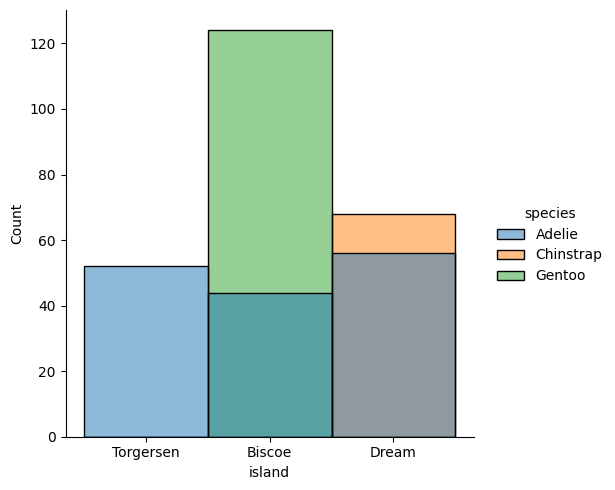

In [34]:
#Plotting penguins present in which island?
sns.displot(data = df, x = 'island', hue = 'species')

Its clear that Torgersen island has only Adelie type of penguins

species
Gentoo    124
Adelie     44
Name: count, dtype: int64


<Axes: xlabel='species'>

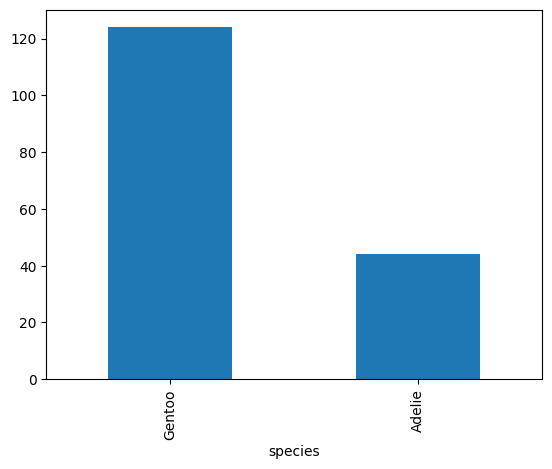

In [40]:
data = df[df['island']=='Biscoe']
print(data['species'].value_counts())
data['species'].value_counts().plot(kind='bar')

Biscoe Island has both Gentoo and Adelie type of penguins. All Gentoo penguins are in this Island only. Also no chinstrap penguins are in Biscoe island

species
Chinstrap    68
Adelie       56
Name: count, dtype: int64


<Axes: xlabel='species'>

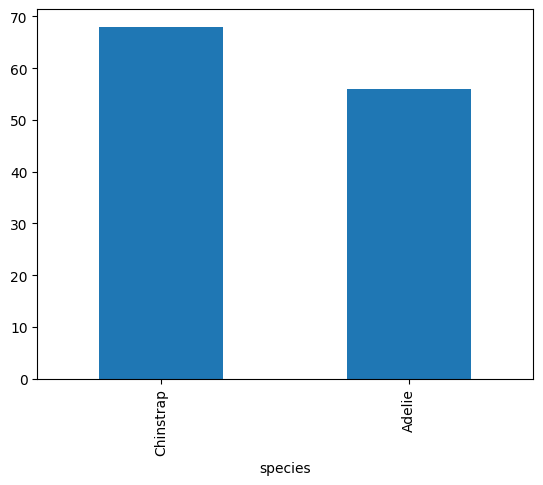

In [41]:
data = df[df['island']=='Dream']
print(data['species'].value_counts())
data['species'].value_counts().plot(kind='bar')

Dream Island has Chinstrap and Adelie Type of penguins. All Chinstrap penguins are in this Island. Also no Gentoo penguins are in this island.

# observation

All chinstrap penguins live in Dream Island

All Gentoo penguins live in Biscoe Island

Adelie penguins are distributed everywhere

Torgersen Island contains only one type of penguin which is Adelie

# Multivariate analysis 

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

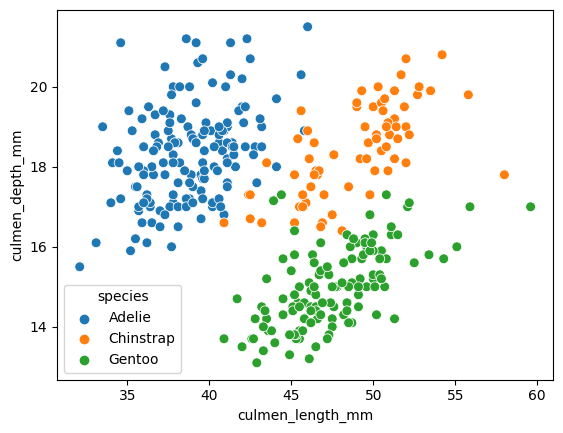

In [43]:
# Culmen depth and culmen Length
sns.scatterplot(data=df, x="culmen_length_mm", y="culmen_depth_mm", hue="species",s=50)

C:\Roshni\MLcode\mlenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


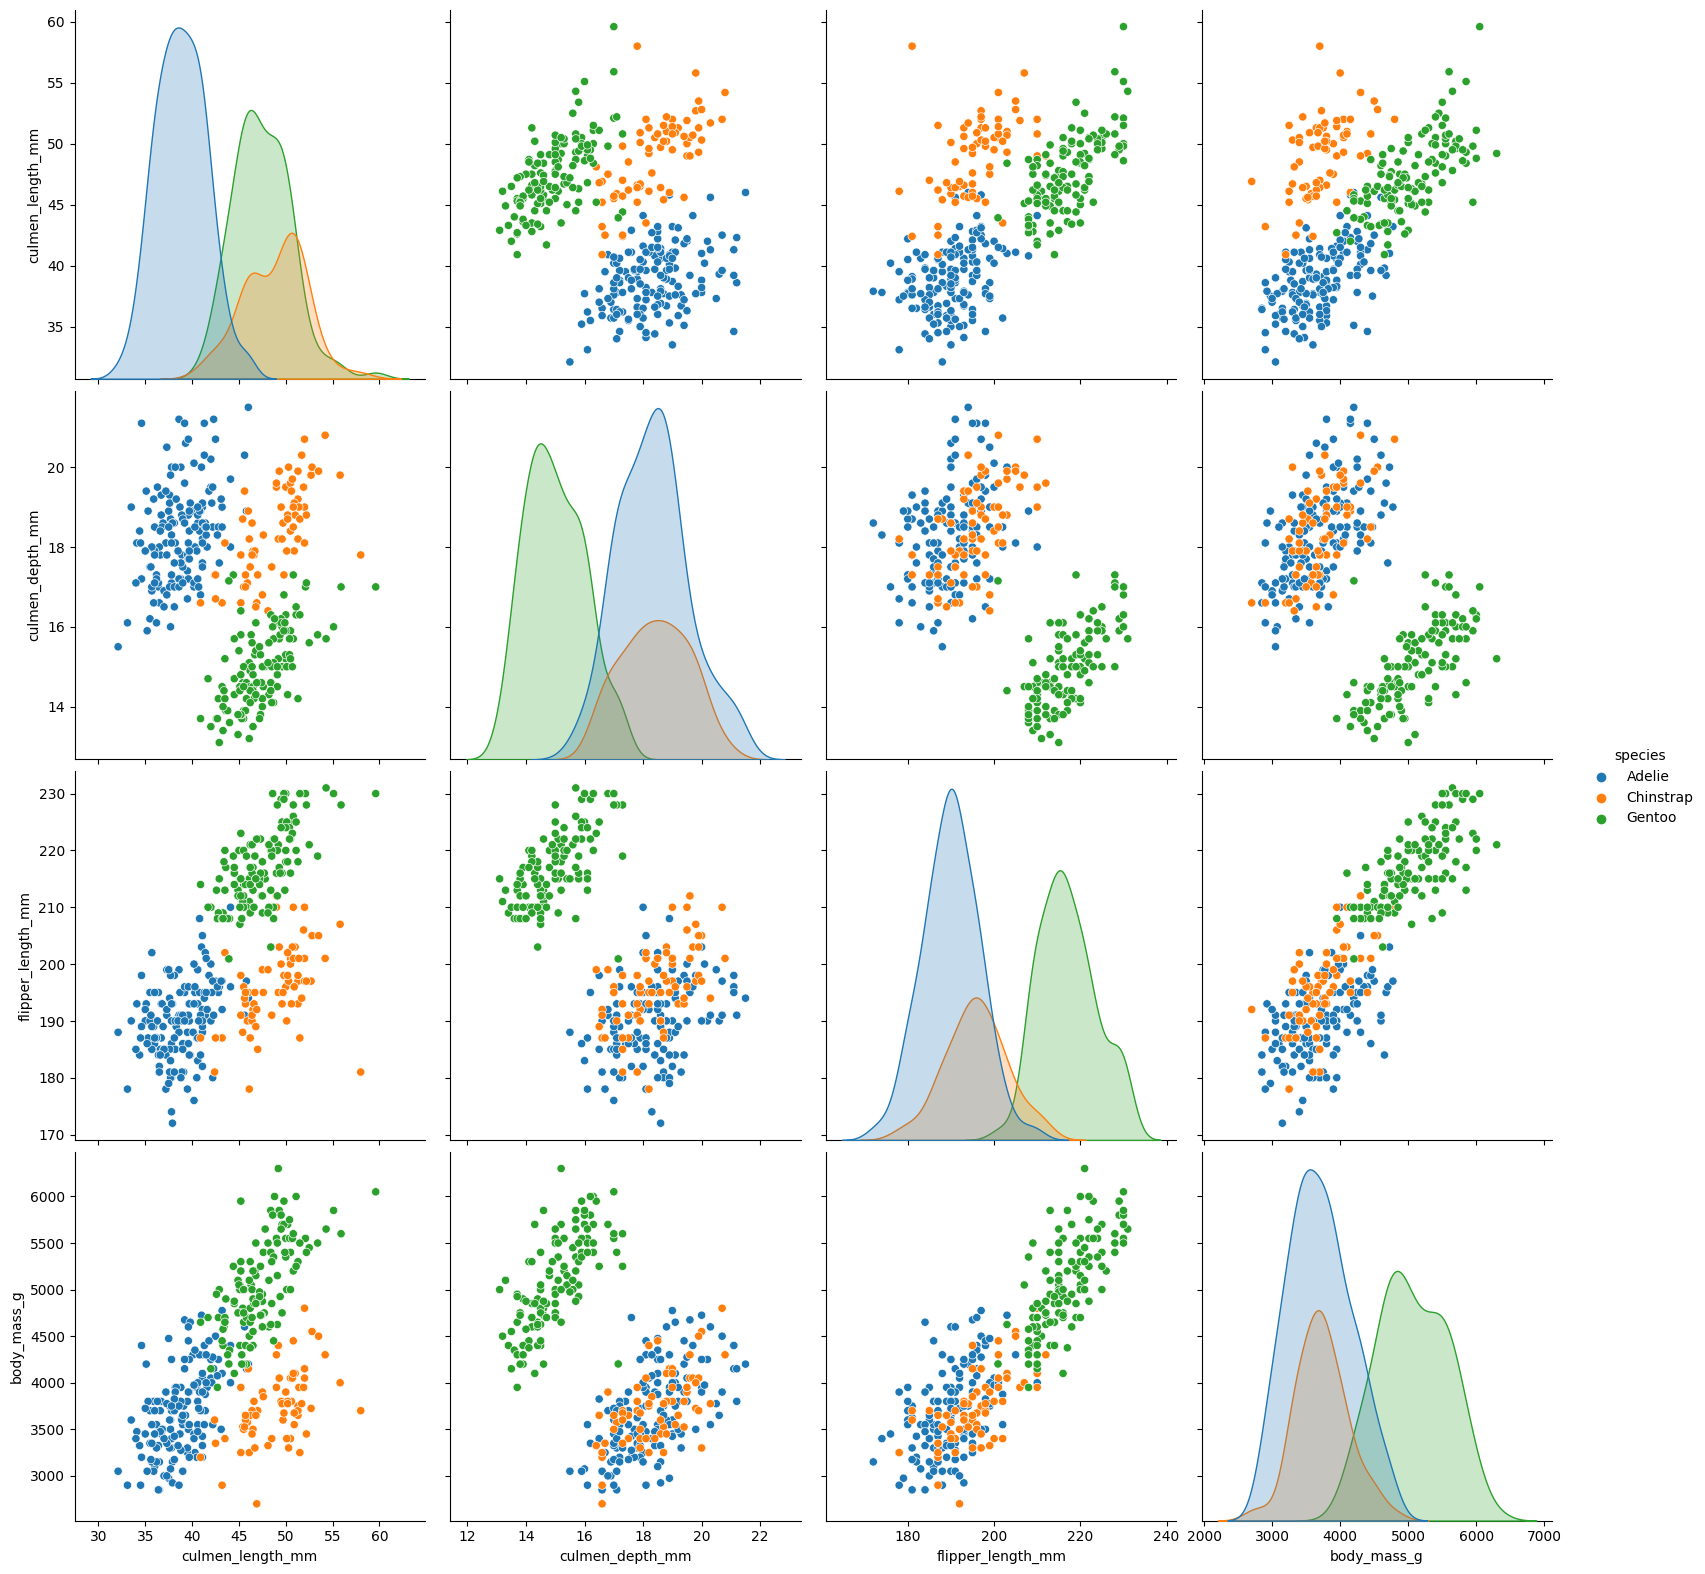

In [46]:
sns.pairplot(df, hue='species', height=4);

Using culmen_depth_mm and culmen_length_mm features, we can distinguish Adelie from others.
Seperating Chinstrap and Gentoo is a bit harder as they have some overlap points.

# Univariate analysis

C:\Roshni\MLcode\mlenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


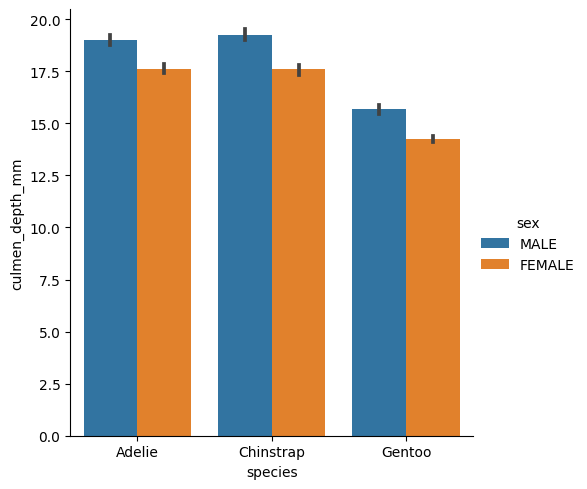

In [50]:
sns.catplot(x="species", y="culmen_depth_mm", hue="sex", data=df, kind= 'bar')

The culmen depth of Gentoo species is less than the other two. Also male part has a higher culmen depth

C:\Roshni\MLcode\mlenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


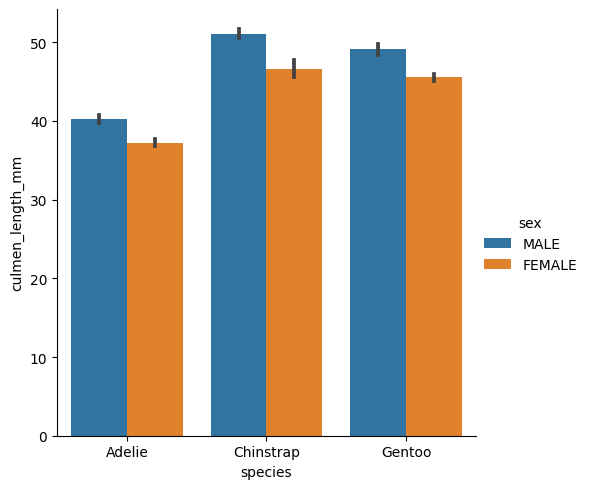

In [51]:
sns.catplot(x="species", y="culmen_length_mm", hue="sex", data=df, kind= 'bar')

The culmen length of Adelie is less than the other two. here also male part has a long culmen

C:\Roshni\MLcode\mlenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


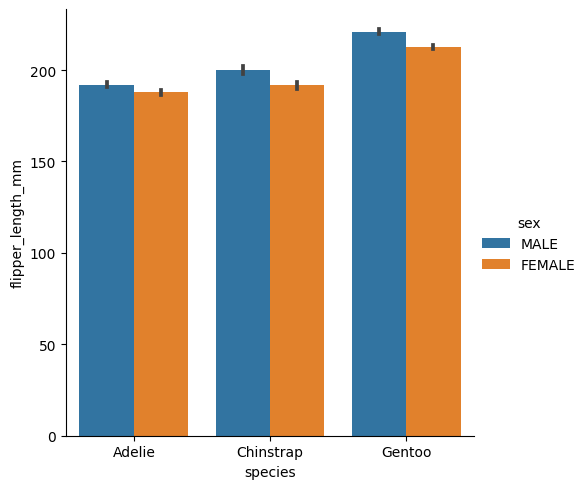

In [52]:
sns.catplot(x="species", y="flipper_length_mm", hue="sex", data=df, kind= 'bar')

The flipper length of Adelie species is small and Gentoo has long flippers. Flipper length of male is longer than female

C:\Roshni\MLcode\mlenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


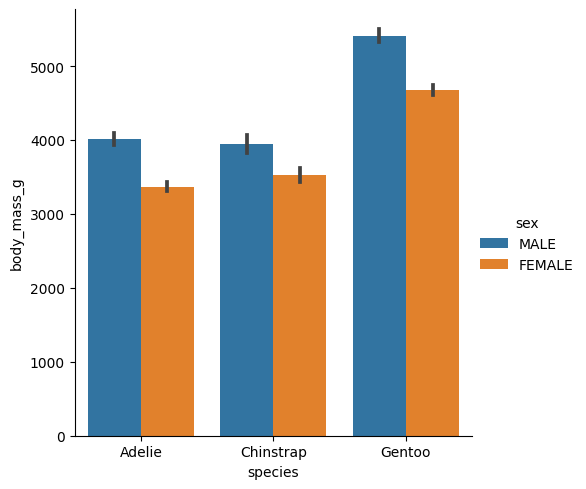

In [53]:
sns.catplot(x="species", y="body_mass_g", hue="sex", data=df, kind= 'bar')

The body mass of all penguins plotted and found that Gentoo penguin has more body weight than the other two species and also male penguins weigh more than females.

# Observations
Body mass : 
Adelie and Chinstrap penguins' body mass is less than in Gentoo penguins
male penguins tend to be heavier than their female counterparts.

Flipper length:
flipper lengths of Adelie penguins are shorter.
male penguins' flippers tend to be longer than female penguins' flippers.

Culmen length and depth:
male penguins tend to have longer and deeper culmens than female penguins.
The culmen depth of Gentoo species is less
The culmen length of Adelie species is less